In [34]:
# import the needed libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px 

In [35]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(22)

# Create Sales and Cost columns
sales = np.random.randint(100, 500, size=200)
cost = np.random.randint(80, 400, size=200)

# Construct the data dictionary
data = {
    'Date': pd.date_range(start='1/1/2023', periods=200, freq='D'),
    'Product': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'] * 25,
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West'] * 25,
    'Sales': pd.Series(sales), 
    'Cost': pd.Series(cost)
}

# Introduce some missing values
data['Sales'].iloc[np.random.randint(0, 200, 10)] = np.nan
data['Cost'].iloc[np.random.randint(0, 200, 10)] = np.nan

# Create the DataFrame
df = pd.DataFrame(data)

In [36]:
# Check the data
df.sample(5)

,Date,Product,Region,Sales,Cost
100,2023-04-11,E,North,348.0,149.0
86,2023-03-28,G,East,169.0,262.0
31,2023-02-01,H,West,123.0,326.0
146,2023-05-27,C,East,119.0,321.0
111,2023-04-22,H,West,116.0,260.0


### Data Cleaning

**Task**: Identify and handle missing values in the 'Sales' and 'Cost' columns. Replace missing values with the mean of their respective columns.  

In [37]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     200 non-null    datetime64[ns]
 1   Product  200 non-null    object        
 2   Region   200 non-null    object        
 3   Sales    190 non-null    float64       
 4   Cost     190 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.9+ KB


**Question**: What is the total number of missing values in the dataset before cleaning?  

In [38]:
missingData = df.isnull().sum()
missingData

Date        0
Product     0
Region      0
Sales      10
Cost       10
dtype: int64

#### Data Information states that Sales and Cost has 10 Distinct missing data from the dataframe


In [39]:
# Fill missing values with mean of the column values

meanSales= df['Sales'].mean()
df.fillna({'Sales' : meanSales}, inplace=True)

meanCost= df['Cost'].mean()
df.fillna({'Cost' : meanCost}, inplace=True)

In [40]:
# Check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     200 non-null    datetime64[ns]
 1   Product  200 non-null    object        
 2   Region   200 non-null    object        
 3   Sales    200 non-null    float64       
 4   Cost     200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.9+ KB


#### Confirm missing datas in Sales and Cost has been filled with mean values

In [41]:
df.isnull().sum()

Date       0
Product    0
Region     0
Sales      0
Cost       0
dtype: int64

### Feature Engineering:

**Task**: Create a new column named 'Profit/Loss' that calculates the difference between 'Sales' and 'Cost'.  
**Question**: After creating the 'Profit/Loss' column, what is the average 'Profit/Loss' for product 'A'?

In [42]:
df['Profit/Loss'] = df['Sales']-df['Cost']

In [43]:
df.sample(5)

,Date,Product,Region,Sales,Cost,Profit/Loss
75,2023-03-17,D,West,492.0,396.0,96.0
18,2023-01-19,C,East,127.0,161.0,-34.0
108,2023-04-19,E,North,483.0,94.0,389.0
47,2023-02-17,H,West,349.0,158.0,191.0
6,2023-01-07,G,East,492.0,381.0,111.0


In [44]:
# Question: After creating the 'Profit/Loss' column, what is the average 'Profit/Loss' for product 'A'?
ProdA = df.groupby(by='Product')['Profit/Loss'].mean().head(1)
pd.DataFrame(ProdA) # Convert it to a Data Frame

,Profit/Loss
Product,
A,75.075158


In [71]:
ProdAvg = df.groupby(by='Product')['Profit/Loss'].mean().sort_values(ascending=False)
pd.DataFrame(ProdAvg)

,Profit/Loss
Product,
E,98.382316
D,85.018526
A,75.075158
F,55.555158
B,55.121895
G,39.203789
H,30.235158
C,29.113263


In [45]:
# Get the overall summation of Sales, Cost and Profit/loss by Region and Product Category
x = df.groupby(['Region', 'Product'])[['Sales','Cost','Profit/Loss']].sum()
x

Sales         Cost  Profit/Loss
Region Product                                       
East   C        6693.831579  5966.000000   727.831579
       G        7532.000000  6551.905263   980.094737
North  A        7610.831579  5733.952632  1876.878947
       E        7905.415789  5445.857895  2459.557895
South  B        6983.000000  5604.952632  1378.047368
       F        7375.831579  5986.952632  1388.878947
West   D        8302.415789  6176.952632  2125.463158
       H        7079.831579  6323.952632   755.878947

In [46]:
# Get the overall summation of Sales, Cost and Profit/loss by Product
y= df.groupby(['Product'])[['Sales','Cost','Profit/Loss']].sum()
y

,Sales,Cost,Profit/Loss
Product,,,
A,7610.831579,5733.952632,1876.878947
B,6983.000000,5604.952632,1378.047368
C,6693.831579,5966.000000,727.831579
D,8302.415789,6176.952632,2125.463158
E,7905.415789,5445.857895,2459.557895
F,7375.831579,5986.952632,1388.878947
G,7532.000000,6551.905263,980.094737
H,7079.831579,6323.952632,755.878947


In [47]:
# Most profitable Product
# Get the overall summation of Profit/loss by Product

profitable_product = df.groupby(['Product'])[
                        ['Profit/Loss']].sum().sort_values(
                            ['Profit/Loss'], ascending=False)
profitable_product

,Profit/Loss
Product,
E,2459.557895
D,2125.463158
A,1876.878947
F,1388.878947
B,1378.047368
G,980.094737
H,755.878947
C,727.831579


In [48]:
# Get the overall summation of Sales, Cost and Profit/loss by Region
x= df.groupby(['Region'])[['Sales',
                           'Cost', 'Profit/Loss']].sum().sort_values(
                               ['Region'], ascending=True)
x

,Sales,Cost,Profit/Loss
Region,,,
East,14225.831579,12517.905263,1707.926316
North,15516.247368,11179.810526,4336.436842
South,14358.831579,11591.905263,2766.926316
West,15382.247368,12500.905263,2881.342105


In [49]:
# Get the overall summation of Sales, Cost and Profit/loss by Region
x= df.groupby(['Region'])[['Sales', 'Cost', 
                           'Profit/Loss']].sum().sort_values(
                               ['Sales'], ascending=False)
x

,Sales,Cost,Profit/Loss
Region,,,
North,15516.247368,11179.810526,4336.436842
West,15382.247368,12500.905263,2881.342105
South,14358.831579,11591.905263,2766.926316
East,14225.831579,12517.905263,1707.926316


In [50]:
# Get the overall summation of Sales by Region only
overall_sales = df.groupby(by='Region')['Sales'].sum()
pd.DataFrame(overall_sales)
# overall_sales

,Sales
Region,
East,14225.831579
North,15516.247368
South,14358.831579
West,15382.247368


In [51]:
# Get the overall summation of Sales by Product
prod_sales = df.groupby(by='Product')['Sales'].sum()
prod_sales = pd.DataFrame(prod_sales).sort_values(['Sales'], ascending=False)
prod_sales

,Sales
Product,
D,8302.415789
E,7905.415789
A,7610.831579
G,7532.000000
F,7375.831579
H,7079.831579
B,6983.000000
C,6693.831579


### Data Visualization:

**Task**: Create a bar chart showing the total 'Sales' for each product across all regions.  
**Question**: Which product has the highest total sales?  

#### Which Region has the highest Sales?

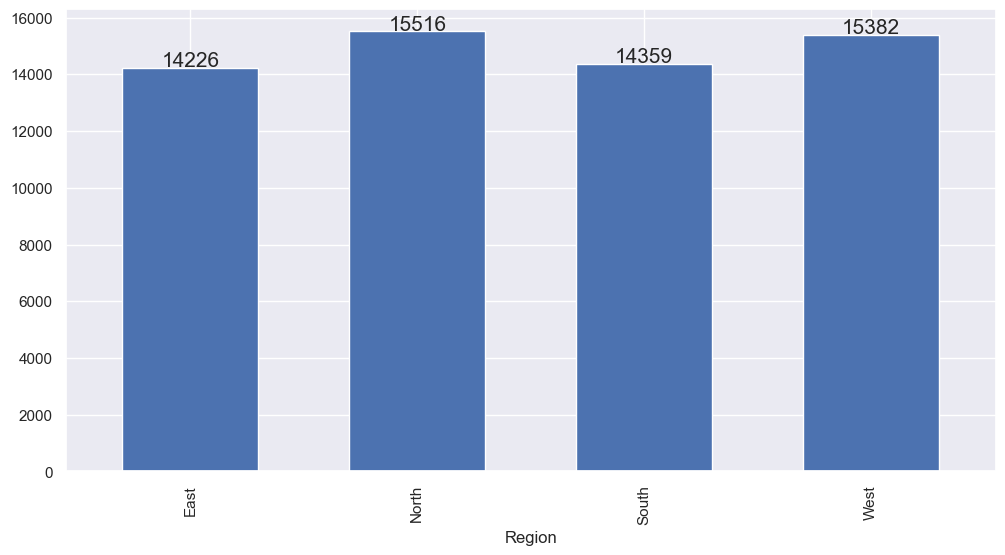

In [52]:
# Total Sales per Region 
sns.set_style(style='darkgrid')  # Defining the initial style which will be obeyed all through the viz
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              color_codes=True)  # Defining the initial theme which will be obeyed all through the viz
plt.figure(figsize=(12,6))
region=df.groupby(by='Region')['Sales'].sum()

region = region.plot.bar(width = 0.6)
for i in region.patches: # Creating annotation i.e to display the figures
    region.annotate(format(i.get_height(), '.0f'),
                  (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 5),
                 textcoords='offset points')


#### Analysis shows that North has the highest Sales turnout with approx. 15516.

Product with the highest sales:                   D
Sales  8302.415789


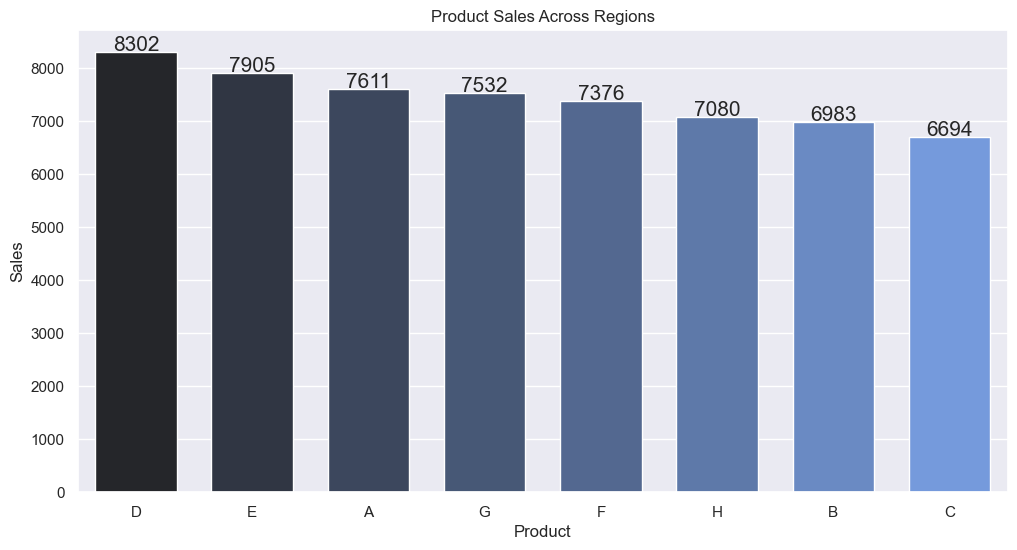

In [53]:
# Task: Create a bar chart showing the total 'Sales' for each product across all regions.  
# Question: Which product has the highest total sales?  

plt.figure(figsize=(12,6)) # To set the visualization frame

prodSales = sns.barplot(data=prod_sales,
                        x='Product',
                        y='Sales', 
                        width = 0.7,
                        hue= 'Product', 
                        palette='dark:cornflowerblue') # configuring the plot characteristics

for i in prodSales.patches:  # Configure annotation i.e to display the figures
    prodSales.annotate(format(i.get_height(), '.0f'),
                  (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 5),
                 textcoords='offset points')
    
plt.title('Product Sales Across Regions') # Plot Title
print(f'Product with the highest sales: ', (pd.DataFrame(prod_sales.iloc[0]))); # Viz summary

#### Product D has the highest sales across all regions

### Profit Analysis:

**Task**: Analyze the 'Profit/Loss' column to determine the most profitable product.  
**Question**: Which product has the highest average 'Profit/Loss' across all regions?  

In [54]:
MostProfitableProduct = profitable_product
profitable_product

,Profit/Loss
Product,
E,2459.557895
D,2125.463158
A,1876.878947
F,1388.878947
B,1378.047368
G,980.094737
H,755.878947
C,727.831579


In [55]:
# The most profitable product
profitable_product.head(1)

,Profit/Loss
Product,
E,2459.557895


In [67]:
MostProfitableAvg = profitable_product.mean()
profitable_product

,Profit/Loss
Product,
E,2459.557895
D,2125.463158
A,1876.878947
F,1388.878947
B,1378.047368
G,980.094737
H,755.878947
C,727.831579


In [74]:
ProdAvg = pd.DataFrame(ProdAvg)

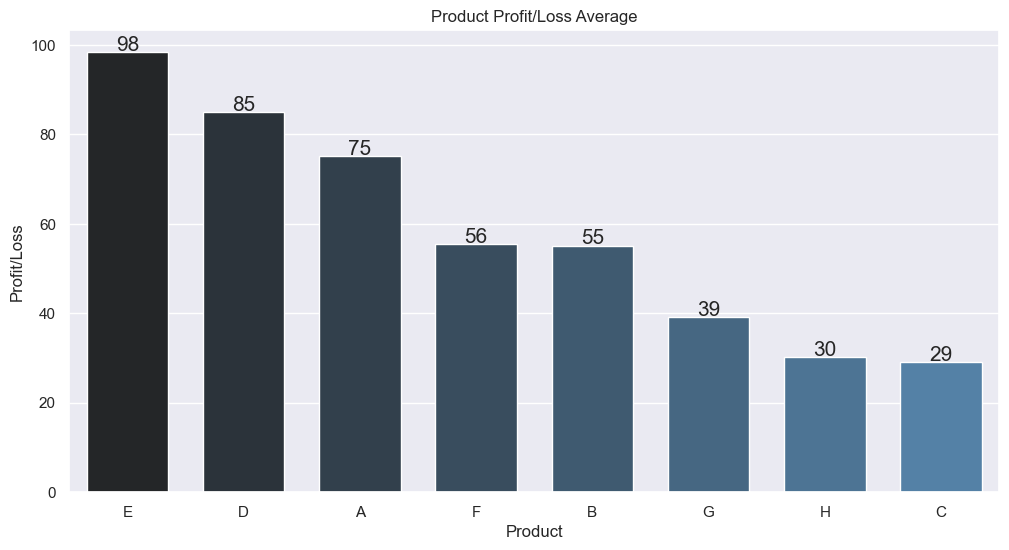

In [76]:
# With barplot, it is easier to show profitability from highest to lowest

plt.figure(figsize=(12,6)) # To set the visualization frame

MostProfitableProduct = sns.barplot(data = ProdAvg,
                                    x='Product',y='Profit/Loss', 
                                    width = 0.7,
                                    hue = 'Product', 
                                    palette ='dark:steelblue') # configuring the plot characteristics

for i in MostProfitableProduct.patches: # Configure annotation i.e to display the figures
    MostProfitableProduct.annotate(format(i.get_height(), '.0f'),
                 (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 5),
                 textcoords='offset points')
plt.title('Product Profit/Loss Average'); # Plot Title

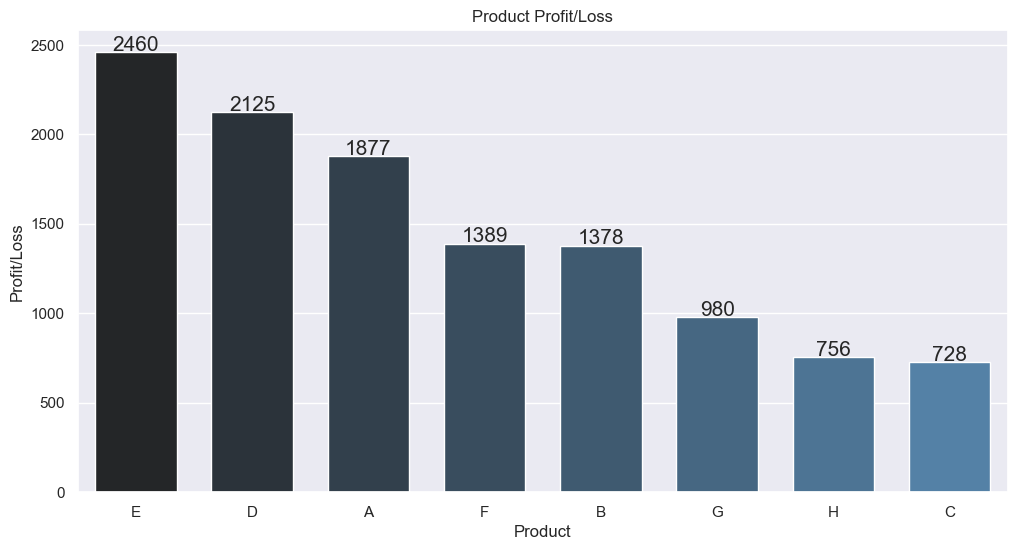

In [56]:
# With barplot, it is easier to show profitability from highest to lowest

plt.figure(figsize=(12,6)) # To set the visualization frame

MostProfitableProduct = sns.barplot(data = profitable_product,
                                    x='Product',y='Profit/Loss', 
                                    width = 0.7,
                                    hue = 'Product', 
                                    palette ='dark:steelblue') # configuring the plot characteristics

for i in MostProfitableProduct.patches: # Configure annotation i.e to display the figures
    MostProfitableProduct.annotate(format(i.get_height(), '.0f'),
                 (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=15, xytext=(0, 5),
                 textcoords='offset points')
plt.title('Product Profit/Loss'); # Plot Title

#### In the above, Product **E** has the highest Profit Margin of approx. 2460 (2459.557895) as well as the highest average.

### Time Series Analysis:

**Task**: Plot the sales trends over time for all products.  
**Question**: Identify any observable trends or seasonality in the sales data.  

In [57]:
# With plotly.express as px, it can be used to create an iterative line chart
#   to indicate the sales performance during during the period

sales_trend =px.line(data_frame = df, 
              x='Date',  # x-axis: Month and Year
              y='Sales',        # y-axis: Sales amount
              labels={'Sales': 'Monthly Sales', 'Date': 'Order Date'},
              title='Monthly Sales Over Time') # Configuring the time series plot
sales_trend

#### Sales trends shows a dwindling (irregular) monthly sales over time with no sign of positive increase

### Correlation Analysis:

**Task**: Calculate the correlation between 'Sales', 'Cost', and 'Profit/Loss'.  
**Question**: Which pair of variables has the highest correlation?  

In [58]:
# Using Correlation matrix, we find the correlation between Sales, Cost and Profit/Loss
# First using pandas corr()
correl = df[['Sales', 'Cost', 'Profit/Loss']].corr()
correl

,Sales,Cost,Profit/Loss
Sales,1.000000,0.036437,0.787402
Cost,0.036437,1.000000,-0.587341
Profit/Loss,0.787402,-0.587341,1.000000


<Axes: >

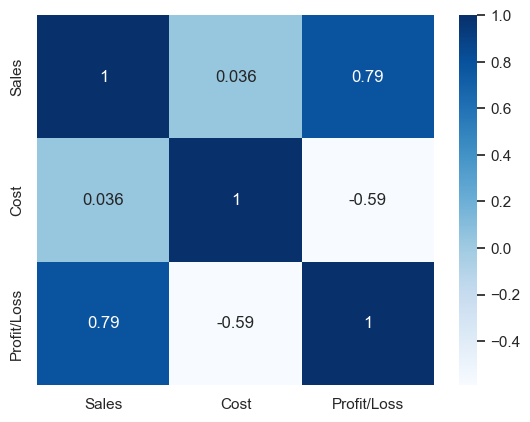

In [59]:
# Plot the correlation using seaborn heat map
sns.heatmap(data=df[['Sales', 'Cost', 
                     'Profit/Loss']].corr(), 
                     annot =True, cmap="Blues")

##### Correlation Analysis show that Sales and Profit/Loss has a correlation. <br>This indicates that, the higher the sales, the higher the profit margin

### Filtering and Aggregation:

**Task**: Filter the dataset for sales in the 'North' region and calculate the total profit for this region.  
**Question**: What is the total profit for the 'North' region?  

In [60]:
# Get the overall summation of Sales, Cost and Profit/loss by Region
North= df.groupby(['Region'])[
        ['Profit/Loss']].sum().sort_values(
        ['Profit/Loss'], ascending=False).head(1)
North

,Profit/Loss
Region,
North,4336.436842


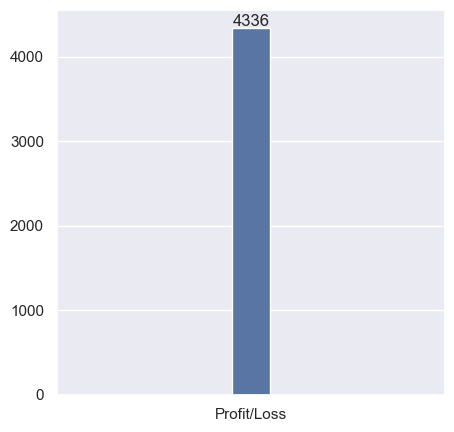

In [61]:
# Using a bar chart showing the total 'Profit/Loss' for the North region.  

plt.figure(figsize=(5,5))
region=df.groupby(by='Region')['Profit/Loss'].sum()

north = sns.barplot(data=North, width = 0.1)

for i in north.patches:
    north.annotate(format(i.get_height(), '.0f'),
                  (i.get_x() + i.get_width() / 2,
                 i.get_height()), ha='center', va='center',
                 size=12, xytext=(0, 5),
                 textcoords='offset points')


### Advanced Feature Engineering:

**Task**: Create a new column 'ROI' (Return on Investment) calculated as `(Profit/Loss / Cost) * 100`.  
**Question**: What is the average ROI for product 'B'?  

In [62]:
df['ROI'] = df['Profit/Loss'] / df['Cost'] * 100
df.head()

,Date,Product,Region,Sales,Cost,Profit/Loss,ROI
0,2023-01-01,A,North,473.0,134.0,339.0,252.985075
1,2023-01-02,B,South,232.0,167.0,65.0,38.922156
2,2023-01-03,C,East,400.0,250.0,150.0,60.000000
3,2023-01-04,D,West,456.0,311.0,145.0,46.623794
4,2023-01-05,E,North,458.0,255.0,203.0,79.607843


In [63]:
# Average ROI of Product B
Avg_ROI = df.groupby(['Product'])['ROI'].mean().sort_values(ascending=False)
Avg_ROI = pd.DataFrame(Avg_ROI)
pd.DataFrame(Avg_ROI)

,ROI
Product,
E,84.185811
D,64.438832
F,53.353480
A,42.729318
B,39.651362
C,34.494837
G,32.988871
H,25.055524


In [64]:
# Average ROI of Product B
Avg_ROI = df.groupby(['Product'])['ROI'].mean().sort_values()
Avg_ROI = pd.DataFrame(Avg_ROI)
pd.DataFrame(Avg_ROI.iloc[3]).T

,ROI
B,39.651362


### Outlier Detection:

**Task**: Identify any outliers in the 'Sales' column using a boxplot.  
**Question**: How many outliers are present in the 'Sales' data?  


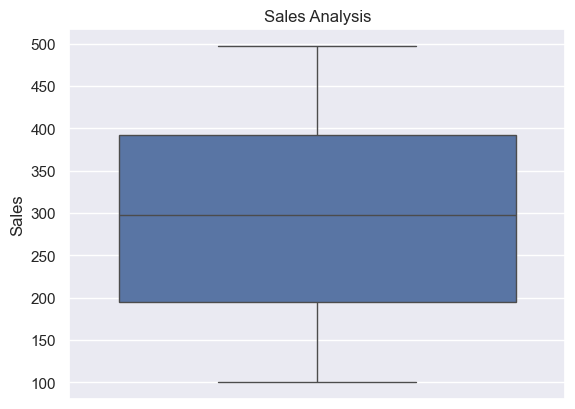

In [65]:
# To check for outliers, we use boxplot to identify any outliers present in the dataset
sns.boxplot(df.Sales)
plt.title('Sales Analysis');

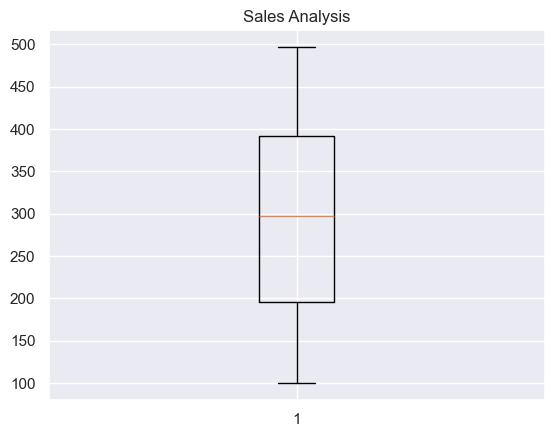

In [66]:
plt.boxplot(data=df, x='Sales')
plt.title('Sales Analysis');

##### There are not outliers in the dataset

### Final Analysis:

**Task**: Provide a summary of your findings, including the key insights from your analysis. 

Mention any patterns, trends, or anomalies you discovered in the data.  

**Question**: Based on your analysis, which product would you recommend for increased focus in sales strategies and why?  
**Hint**: Synthesize the results from all your analyses to form a conclusion.

### SUMMARY

1. This data has no outliers upon analysis

2. There is a correlation between **Sales** and **Profit/Loss**

3. Most sales and profit comes from the **North** followed by **West**

4. Products **D, E, A** has the highest sales margin

5. Products **E, D, A** are the most profitable products

6. Product **A** has the most **ROI**

7. While products  **D, E, A** has the highest sales margin, overall sales day over day are irregular with no upward projection

8. Sales turnout in the East is low with Products **C and G** having low sales and profit margin


#### Recommendation
It can be deduced that products sold in the North and West are attaining market penetration, <br>
     focus should be on the least performig products and region such as the East to ensure <br>
       market penetration and increased sales.

Product promotion should be done across all region with an increased focus on the East. 

The higher the sales margin, the better the profit margin